In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.models import load_model
import seaborn as sns
import io,json
from matplotlib import pyplot as plt
from keras_preprocessing.text import tokenizer_from_json
import matplotlib.pyplot as plt
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
import seaborn as sns
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Input
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.layers import Dense, Input, LSTM, Bidirectional, Conv1D,GRU
from keras.layers import Dropout, Embedding
from keras.preprocessing import text, sequence
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from keras.models import Model
from keras_preprocessing.text import tokenizer_from_json
import json

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import numpy as np
import math
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import text, sequence
from keras.layers import Embedding, Dense, LSTM, Dense, Input, concatenate
from keras.models import Model
import tensorflow as tf
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import datetime
from sklearn.model_selection import train_test_split

In [ ]:
df_social_spambot_1=pd.read_csv('/content/drive/MyDrive/SAAS-2121/Datasets/mini_datasets/mini_social_spambot_1.csv',error_bad_lines=False)
df_social_spambot_2=pd.read_csv('/content/drive/MyDrive/SAAS-2121/Datasets/mini_datasets/mini_social_spambot_2.csv',error_bad_lines=False)
df_social_spambot_3=pd.read_csv('/content/drive/MyDrive/SAAS-2121/Datasets/mini_datasets/mini_social_spambot_3.csv',error_bad_lines=False)
df_traditional_spambot=pd.read_csv('/content/drive/MyDrive/SAAS-2121/Datasets/mini_datasets/mini_traditional_spambots.csv',error_bad_lines=False)
df_mini_genuine=pd.read_csv('/content/drive/MyDrive/SAAS-2121/Datasets/mini_datasets/mini_genuine_new.csv',error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,7,8,9,10,11,12,13,17,18,19,20,21,22,23,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
tweet=df_mini_genuine['RT @morningJewshow: Speaking about Jews and comedy tonight at Temple Emanu-El in San Francisco. In other words, my High Holidays.']
tweets_mini_genuine=df_mini_genuine['RT @morningJewshow: Speaking about Jews and comedy tonight at Temple Emanu-El in San Francisco. In other words, my High Holidays.']

In [ ]:
df_genuine_final = pd.DataFrame(columns = ['text', 'genuine','social_spambot_1','social_spambot_2', 'social_spambot_3','traditional_spambot','fake_followers'])
df_genuine_final['text']=df_mini_genuine['RT @morningJewshow: Speaking about Jews and comedy tonight at Temple Emanu-El in San Francisco. In other words, my High Holidays.']
df_genuine_final['social_spambot_1']=0
df_genuine_final['social_spambot_2']=0
df_genuine_final['social_spambot_3']=0
df_genuine_final['traditional_spambot']=0
df_genuine_final['fake_followers']=0
df_genuine_final['genuine']=1

In [ ]:
df_genuine_final

,text,genuine,social_spambot_1,social_spambot_2,social_spambot_3,traditional_spambot,fake_followers
0,@landun_P https://t.co/R7AW8xXrCZ,1,0,0,0,0,0
1,\@koolkopper:,1,0,0,0,0,0
2,It's game day!! Good luck @SunDevilHoops!!! Ge...,1,0,0,0,0,0
3,RT @tinyambition__: When your girl is not only...,1,0,0,0,0,0
4,Your inspiration motivates you to take the lea...,1,0,0,0,0,0
...,...,...,...,...,...,...,...
1114276,Just know if I come me give up life to serve m...,1,0,0,0,0,0
1114277,Doh be calling up my name if you know you gonn...,1,0,0,0,0,0
1114278,@ExoSwxft ohh,1,0,0,0,0,0
1114279,New Chapter in Arkansas Uncut! http://t.co/cyX...,1,0,0,0,0,0


In [ ]:
mini_bots=pd.read_csv("/content/drive/MyDrive/SAAS-2121/Datasets/mini_datasets/mini_bots.csv")
mini_bots=mini_bots.drop(['Unnamed: 0',
 'Unnamed: 0.1',
 'id',
 'source',
 'user_id',
 'truncated',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'in_reply_to_screen_name',
 'retweeted_status_id',
 'geo',
 'place',
 'contributors',
 'retweet_count',
 'reply_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'num_hashtags',
 'num_urls',
 'num_mentions',
 'created_at',
 'timestamp'],axis=1)

In [ ]:
df_genuine_dropped=df_genuine_final.dropna()

In [ ]:
df_genuine_dropped

,text,genuine,social_spambot_1,social_spambot_2,social_spambot_3,traditional_spambot,fake_followers
0,@landun_P https://t.co/R7AW8xXrCZ,1,0,0,0,0,0
1,\@koolkopper:,1,0,0,0,0,0
2,It's game day!! Good luck @SunDevilHoops!!! Ge...,1,0,0,0,0,0
3,RT @tinyambition__: When your girl is not only...,1,0,0,0,0,0
4,Your inspiration motivates you to take the lea...,1,0,0,0,0,0
...,...,...,...,...,...,...,...
1114276,Just know if I come me give up life to serve m...,1,0,0,0,0,0
1114277,Doh be calling up my name if you know you gonn...,1,0,0,0,0,0
1114278,@ExoSwxft ohh,1,0,0,0,0,0
1114279,New Chapter in Arkansas Uncut! http://t.co/cyX...,1,0,0,0,0,0


In [ ]:
df_final=pd.concat([mini_bots,df_genuine_dropped])

In [ ]:
df_final_temp=df_final.sample(frac=0.5)

In [ ]:
df_final_temp.to_csv("final_dataset.csv")

In [ ]:
#############################################################################################################################################################################################

In [ ]:
df_final_temp=pd.read_csv("/content/drive/MyDrive/SAAS-2121/Datasets/mini_datasets/final_dataset.csv")

categorywise_data = df_final_temp[['genuine','social_spambot_1','social_spambot_2', 'social_spambot_3','traditional_spambot','fake_followers']] 
counts_category = []                                              
categories = list(categorywise_data.columns.values)
for i in categories:
    counts_category.append((i, categorywise_data[i].sum()))
    
dataframe = pd.DataFrame(counts_category, columns=['Labels', 'number_of_comments'])

EMBEDDING_FILE = '/content/drive/MyDrive/SAAS-2121/Bot_Ranking_Code/Hate_Speech_Detection/glove.6B.50d.txt'
max_features=75000
maxlen=250
embed_size=50

del df_final_temp["Unnamed: 0"]

df_final_temp=df_final_temp.drop_duplicates(subset='text')


#Tweet pre-processing (substituting urls with <'URL'> and account mentions with <'ACCOUNT'>)

In [ ]:
df_final_temp

,text,genuine,social_spambot_1,social_spambot_2,social_spambot_3,traditional_spambot,fake_followers
0,RT @KaptaanKiTigres: #KaptaanKhanOnGeo,1,0,0,0,0,0
5,Brain fitness seen as hot industry of the futu...,0,0,0,0,1,0
6,"""'Twas the Night After Edmund"" available on IT...",0,0,0,0,0,1
8,Chuva chata tudo praga do @sr_renato,0,0,0,0,0,1
16,Flood-hit town gets safety support - http://ti...,0,0,0,0,1,0
...,...,...,...,...,...,...,...
210408,I don't think going through all his fetus musi...,0,0,1,0,0,0
210415,My lrt&amp;quote thats just like me!,0,0,1,0,0,0
210423,kiwi doesn't know what a penis is,0,0,1,0,0,0
210434,don't keep askin for my advice if you don't li...,0,0,1,0,0,0


In [ ]:
## Cleaning tweets functions => substituting urls with "<URL>" and account mentions with "<ACCOUNT>"

def remove_urls(string):
    urls=re.compile(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
    for url in re.findall(urls, string):
      string=re.sub(url, "<URL>", string)
    
    return string

def remove_tags(string):
    tags=re.compile(r'(^|[^@\w])@(\w{1,15})\b')
    for tag in re.findall(tags, string):
      account_name='@'+tag[1]
      string=re.sub(account_name, "<ACCOUNT>", string)
  
    return string

def clean_tweets(tweets):
  tweets_without_urls_and_tags = []
  for tweet in list(tweets):
    try:
      tweet_without_urls_and_tags = remove_tags(remove_urls(tweet))
      tweets_without_urls_and_tags.append(tweet_without_urls_and_tags)
    except:
      tweet=''
      tweets_without_urls_and_tags.append(tweet)

  return tweets_without_urls_and_tags



In [ ]:
## cleaning the tweets, renaming and reordering columns 
df_final_temp['cleaned_tweets'] = clean_tweets(df_final_temp['text'])
df_final_temp.drop('text', axis=1, inplace=True)
df_final_temp.rename(columns={"cleaned_tweets":"text"}, inplace=True)
cols = df_final_temp.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_final_temp = df_final_temp[cols]
df_final_temp

,text,genuine,social_spambot_1,social_spambot_2,social_spambot_3,traditional_spambot,fake_followers
0,RT <ACCOUNT>: #KaptaanKhanOnGeo,1,0,0,0,0,0
5,Brain fitness seen as hot industry of the futu...,0,0,0,0,1,0
6,"""'Twas the Night After Edmund"" available on IT...",0,0,0,0,0,1
8,Chuva chata tudo praga do <ACCOUNT>,0,0,0,0,0,1
16,Flood-hit town gets safety support - <URL>,0,0,0,0,1,0
...,...,...,...,...,...,...,...
210408,I don't think going through all his fetus musi...,0,0,1,0,0,0
210415,My lrt&amp;quote thats just like me!,0,0,1,0,0,0
210423,kiwi doesn't know what a penis is,0,0,1,0,0,0
210434,don't keep askin for my advice if you don't li...,0,0,1,0,0,0


In [ ]:
df_final_temp.head()

,text,genuine,social_spambot_1,social_spambot_2,social_spambot_3,traditional_spambot,fake_followers
0,RT <ACCOUNT>: #KaptaanKhanOnGeo,1,0,0,0,0,0
5,Brain fitness seen as hot industry of the futu...,0,0,0,0,1,0
6,"""'Twas the Night After Edmund"" available on IT...",0,0,0,0,0,1
8,Chuva chata tudo praga do <ACCOUNT>,0,0,0,0,0,1
16,Flood-hit town gets safety support - <URL>,0,0,0,0,1,0


In [ ]:
#test-train split

train, test = train_test_split(df_final_temp, test_size=0.2)
train

,text,genuine,social_spambot_1,social_spambot_2,social_spambot_3,traditional_spambot,fake_followers
143136,<URL>,0,1,0,0,0,0
190829,"What's up with these ""Did I really die?"" billb...",0,0,1,0,0,0
137665,"I ragazzini di oggi, senza ginocchia sbucciate...",0,1,0,0,0,0
196825,<ACCOUNT> My son played football at PSHS (Clas...,1,0,0,0,0,0
113132,<ACCOUNT> DONT LET THIS FLOP IT TOOK ME A WHIL...,1,0,0,0,0,0
...,...,...,...,...,...,...,...
69137,"I sent Aleah a snap saying ""I'm on my way to s...",0,0,1,0,0,0
66547,La natura con la sua bellezza e armonia è in g...,0,1,0,0,0,0
145713,"Acabo de completar ""A que d\xe9cada voc\xea re...",0,0,0,0,1,0
163824,Corona che scrive una lettera dalla prigione: ...,0,1,0,0,0,0


In [ ]:
train_x=train["text"]
test_x=test["text"]
train_x = train['text'].str.lower()
test_x = test['text'].str.lower()

In [ ]:
train_x

143136                                                <url>
190829    what's up with these "did i really die?" billb...
137665    i ragazzini di oggi, senza ginocchia sbucciate...
196825    <account> my son played football at pshs (clas...
113132    <account> dont let this flop it took me a whil...
                                ...                        
69137     i sent aleah a snap saying "i'm on my way to s...
66547     la natura con la sua bellezza e armonia è in g...
145713    acabo de completar "a que d\xe9cada voc\xea re...
163824    corona che scrive una lettera dalla prigione: ...
176515    <account> cloak and track your affiliate links...
Name: text, Length: 31140, dtype: object

In [ ]:
df_final_temp['text'].values

array(['RT <ACCOUNT>: #KaptaanKhanOnGeo',
       'Brain fitness seen as hot industry of the future <URL>',
       '"\'Twas the Night After Edmund" available on ITunes now! Go check it out!',
       ..., "kiwi doesn't know what a penis is",
       "don't keep askin for my advice if you don't like it LOL",
       'Read the History of the Stylistics  <URL>'], dtype=object)

In [ ]:
train_y = train[['genuine','social_spambot_1','social_spambot_2', 'social_spambot_3','traditional_spambot','fake_followers']].values
test_y=test[['genuine','social_spambot_1','social_spambot_2', 'social_spambot_3','traditional_spambot','fake_followers']].values
df_final_temp=df_final_temp.applymap(str)
sentiment = train_x
max_len=250

In [ ]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(sentiment))
seq = tokenizer.texts_to_sequences(sentiment)
pad = sequence.pad_sequences(seq, maxlen=max_len)

In [ ]:
train_x=train_x.apply(str)
test_x=test_x.apply(str)

In [ ]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers


def model_add():
    inputs = Input(shape=(250, ))
    x = Embedding(20000, 128)(inputs)
    x = Bidirectional(LSTM(50))(x)
    x = Dropout(0.1)(x)
    x = Dense(50, activation="relu")(x)
    x = Dropout(0.1)(x)
    outputs = Dense(6, activation="sigmoid")(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model
model = model_add()
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 250, 128)          2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               71600     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 306   

In [ ]:
len(train_y)


31140

In [ ]:
len(pad)

31140

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early = EarlyStopping(monitor="val_loss", mode="min", patience=20)
model.fit(pad, train_y, batch_size=32, epochs=10, validation_split=0.1, callbacks=early)

Epoch 1/10
876/876 [==============================] - 99s 104ms/step - loss: 0.2633 - accuracy: 0.6210 - val_loss: 0.1901 - val_accuracy: 0.7396
Epoch 2/10
876/876 [==============================] - 90s 103ms/step - loss: 0.1577 - accuracy: 0.7941 - val_loss: 0.1729 - val_accuracy: 0.7636
Epoch 3/10
876/876 [==============================] - 90s 103ms/step - loss: 0.1135 - accuracy: 0.8586 - val_loss: 0.1802 - val_accuracy: 0.7608
Epoch 4/10
876/876 [==============================] - 90s 103ms/step - loss: 0.0860 - accuracy: 0.8947 - val_loss: 0.2098 - val_accuracy: 0.7717
Epoch 5/10
876/876 [==============================] - 90s 103ms/step - loss: 0.0678 - accuracy: 0.9179 - val_loss: 0.2340 - val_accuracy: 0.7566
Epoch 6/10
876/876 [==============================] - 90s 103ms/step - loss: 0.0563 - accuracy: 0.9295 - val_loss: 0.2549 - val_accuracy: 0.7640
Epoch 7/10
876/876 [==============================] - 90s 103ms/step - loss: 0.0477 - accuracy: 0.9388 - val_loss: 0.3154 - val_ac

In [ ]:
model.save("tweet_model.h5")

In [ ]:
import io,json
tokenizer_json = tokenizer.to_json()
with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [ ]:
with open('tokenizer.json') as f:
    data = json.load(f)
    tokenizer= tokenizer_from_json(data)
model = load_model('tweet_model.h5')

In [ ]:
def BILSTM_Predict(text):
    tweet= [text]
    y_list = ["genuine","social_spambot_1","social_spambot_2","social_spambot_3","traditional_spambot","fake_followers"]
    tweet_seq = tokenizer.texts_to_sequences(tweet)
    tweet_pad = sequence.pad_sequences(tweet_seq, maxlen=250)
    y_prob = model.predict([tweet_pad]) 
    y_prob.argmax(axis=-1)
    result=y_prob[0]
    final=[x for _, x in sorted(zip(result, y_list),reverse=True)]
    for i,j in sorted(zip(result, y_list),reverse=True):
        print(str(i)+"                 "+str(j))  

In [ ]:
BILSTM_Predict('i think this is it')

0.37555882                 genuine
0.28666285                 fake_followers
0.24501717                 social_spambot_2
0.11124959                 traditional_spambot
0.044882283                 social_spambot_3
0.031112637                 social_spambot_1


In [ ]:
def tweet(text,tweet_model,tokenizer):
    tweet= [text]
    y_list = ["genuine","social_spambot_1","social_spambot_2","social_spambot_3","traditional_spambot","fake_followers"]
    tweet_seq = tokenizer.texts_to_sequences(tweet)
    tweet_pad = sequence.pad_sequences(tweet_seq, maxlen=250)
    y_prob = tweet_model.predict([tweet_pad]) 
    y_prob.argmax(axis=-1)
    result=y_prob[0]
    final=[x for _, x in sorted(zip(result, y_list),reverse=True)]
    bot_perc=result[0]
    non_bot_perc=sum(result[1:])
    print((bot_perc/non_bot_perc)*100)

In [ ]:
def account_tweet(account_metadata,text_list):
  with open('tokenizer.json') as f:
    data = json.load(f)
    tokenizer= tokenizer_from_json(data)
  tweet_model = load_model('tweet_model.h5')
  for i in text_list:
    tweet(i,tweet_model,tokenizer)
  account_model = load_model('/content/drive/MyDrive/SAAS-2121/Account_level_code/account_level.h5')
  print("Account level : ",account_model.predict(account_metadata)[0]*100)

In [ ]:
account_tweet([[ 0.82868672,  1.        ,  0.        ,  0.20498027,  0.28777462,-0.01814796, -0.24477836,  0.        ,  1.        ,  1.        ]],["hello this is it"])

57.84366678052003
Account level :  [90.411255]


In [ ]:
"##############################################################################################################################################"

'##############################################################################################################################################'

In [ ]:
test_x

7361      rt <account>: <account> new mixtape vs13 get i...
154413            setting up twitter for my squidoo account
9115      commento serio sulla suora di rieti: spero che...
33602     learn about advanced weight scales and body mo...
30377        76 if you want 100 followers a day use <url> .
                                ...                        
68910     <account> <account> hahaha yan ba yung time na...
182469    learn about the history of the nautilus fitnes...
98844     putting headphones in and gonna listen to the ...
208678                                       <account> nice
201055    perché la psicoanalisi e' molto più veloce neg...
Name: text, Length: 7785, dtype: object

In [ ]:
train_x = tokenizer.texts_to_sequences(train_x)
test_x = tokenizer.texts_to_sequences(test_x)
train_x = sequence.pad_sequences(train_x, maxlen=maxlen)
test_x = sequence.pad_sequences(test_x, maxlen=maxlen)

In [ ]:

embeddings_index = {}
with open(EMBEDDING_FILE, encoding='utf8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
word_index = tokenizer.word_index
num_words = min(max_features, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embed_size))
for word, i in word_index.items():
    if i >= max_features:
        continue
    
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation

In [ ]:
inputs = Input(shape=(max_len, ))
x = Embedding(20000, 128)(inputs)
x = Bidirectional(LSTM(50))(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
outputs = Dense(6, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 250, 128)          2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               71600     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 306   

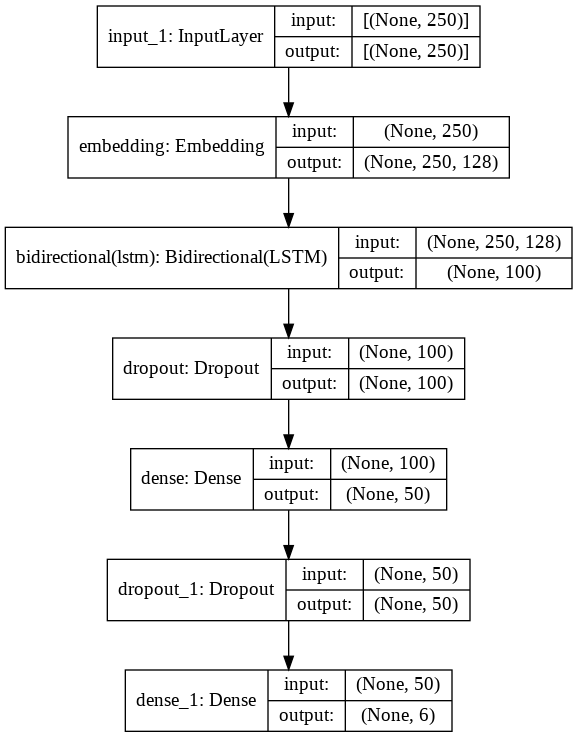

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='BI_LSTM.png', show_shapes=True, show_layer_names=True)